In [1]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *
import cv2

from scipy import ndimage, fft

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


#### Experiment #1 : Symmetric Convolution


In [2]:
'''model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))'''

"model = VGG16(weights='imagenet',\n                  include_top=False,\n                  input_shape=(224, 224, 3))"

In [3]:
k = 20 # Top 10% highest l2-magnitude filters

Text(0.5, 1.0, 'DCT LaplaceX')

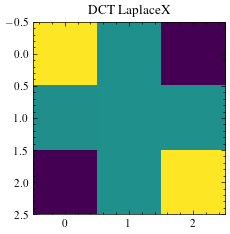

In [10]:


t = np.zeros((3,3))
t[1, 1] = 1

filters = np.reshape(fft.idctn(t, norm='ortho'), (3,3,1,1))
filters = filters / tf.reduce_sum(tf.abs(filters))

plt.imshow(filters[..., 0,0])
plt.title("DCT LaplaceX")



In [12]:
#var = 2/(128*9)

img =  cv2.imread('input4.png', 0)/255. 
#img = (img-np.mean(img))/np.std(img)
#img = tf.repeat(tf.expand_dims([img], axis=-1) , repeats = 512, axis=-1)  #get_double_slit(shape) , axis=0)
print(img.shape)

(224, 224)


In [13]:
np.var(img), 1/(128*9)


(0.023040123255935026, 0.0008680555555555555)

(3, 3, 1, 1)
0
(1, 224, 224, 1)
(1, 224, 224, 1)
1
(1, 224, 224, 1)
(1, 224, 224, 1)
2
(1, 224, 224, 1)
(1, 224, 224, 1)
3
(1, 224, 224, 1)
(1, 224, 224, 1)
4
(1, 224, 224, 1)
(1, 224, 224, 1)
5
(1, 224, 224, 1)
(1, 224, 224, 1)
6
(1, 224, 224, 1)
(1, 224, 224, 1)
7
(1, 224, 224, 1)
(1, 224, 224, 1)
8
(1, 224, 224, 1)
(1, 224, 224, 1)
9
(1, 224, 224, 1)
(1, 224, 224, 1)
10
(1, 224, 224, 1)
(1, 224, 224, 1)
11
(1, 224, 224, 1)
(1, 224, 224, 1)
12
(1, 224, 224, 1)
(1, 224, 224, 1)
13
(1, 224, 224, 1)
(1, 224, 224, 1)
14
(1, 224, 224, 1)
(1, 224, 224, 1)
15
(1, 224, 224, 1)
(1, 224, 224, 1)
16
(1, 224, 224, 1)
(1, 224, 224, 1)
17
(1, 224, 224, 1)
(1, 224, 224, 1)
18
(1, 224, 224, 1)
(1, 224, 224, 1)
19
(1, 224, 224, 1)
(1, 224, 224, 1)
20
(1, 224, 224, 1)
(1, 224, 224, 1)


c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


21
(1, 224, 224, 1)
(1, 224, 224, 1)
22
(1, 224, 224, 1)
(1, 224, 224, 1)
23
(1, 224, 224, 1)
(1, 224, 224, 1)
24
(1, 224, 224, 1)
(1, 224, 224, 1)
25
(1, 224, 224, 1)
(1, 224, 224, 1)
26
(1, 224, 224, 1)
(1, 224, 224, 1)
27
(1, 224, 224, 1)
(1, 224, 224, 1)
28
(1, 224, 224, 1)
(1, 224, 224, 1)
29
(1, 224, 224, 1)
(1, 224, 224, 1)
30
(1, 224, 224, 1)
(1, 224, 224, 1)
31
(1, 224, 224, 1)
(1, 224, 224, 1)
32
(1, 224, 224, 1)
(1, 224, 224, 1)
33
(1, 224, 224, 1)
(1, 224, 224, 1)
34
(1, 224, 224, 1)
(1, 224, 224, 1)
35
(1, 224, 224, 1)
(1, 224, 224, 1)
36
(1, 224, 224, 1)
(1, 224, 224, 1)
37
(1, 224, 224, 1)
(1, 224, 224, 1)
38
(1, 224, 224, 1)
(1, 224, 224, 1)
39
(1, 224, 224, 1)
(1, 224, 224, 1)
40
(1, 224, 224, 1)
(1, 224, 224, 1)
41
(1, 224, 224, 1)
(1, 224, 224, 1)
42
(1, 224, 224, 1)
(1, 224, 224, 1)
43
(1, 224, 224, 1)
(1, 224, 224, 1)
44
(1, 224, 224, 1)
(1, 224, 224, 1)
45
(1, 224, 224, 1)
(1, 224, 224, 1)
46
(1, 224, 224, 1)
(1, 224, 224, 1)
47
(1, 224, 224, 1)
(1, 224, 224, 1)
4

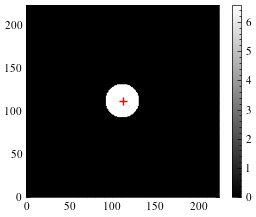

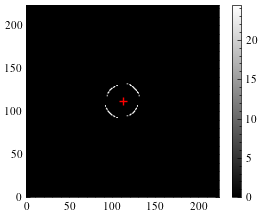

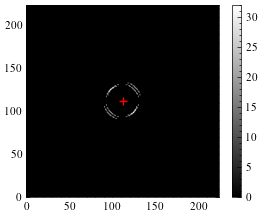

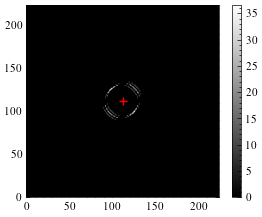

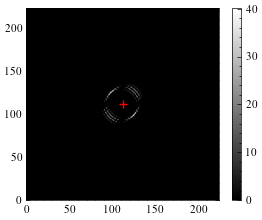

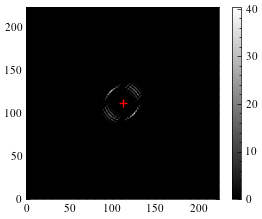

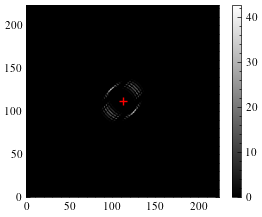

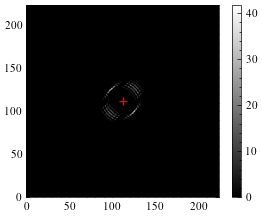

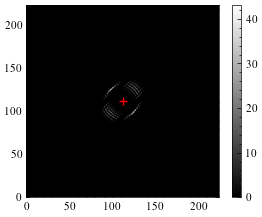

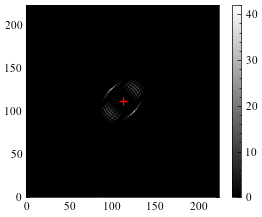

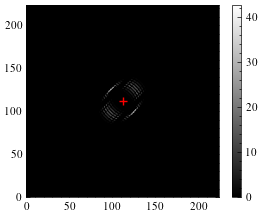

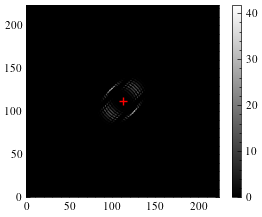

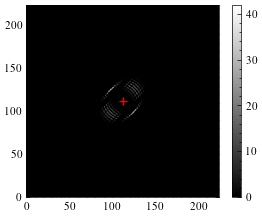

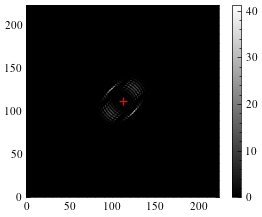

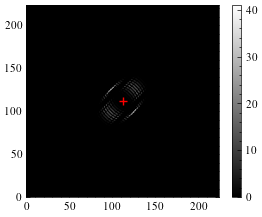

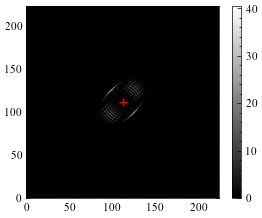

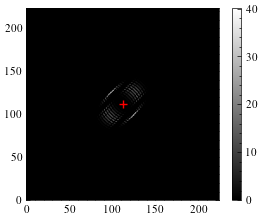

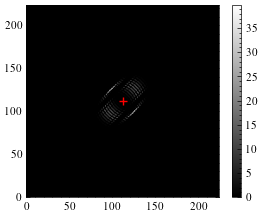

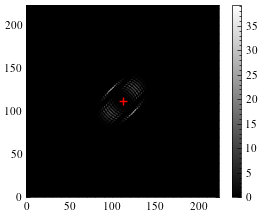

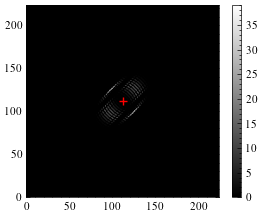

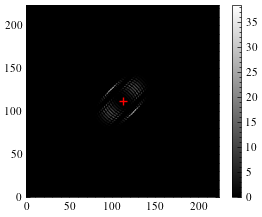

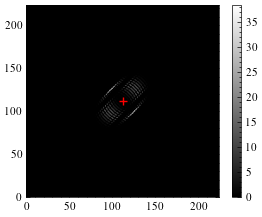

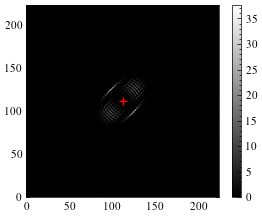

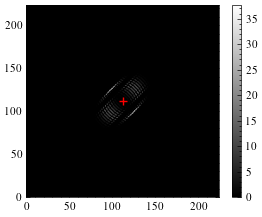

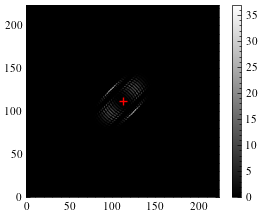

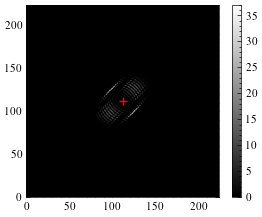

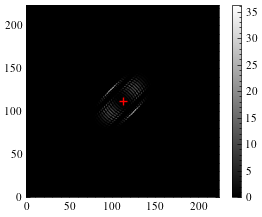

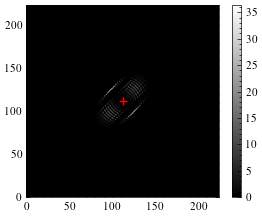

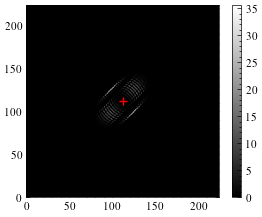

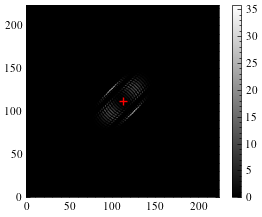

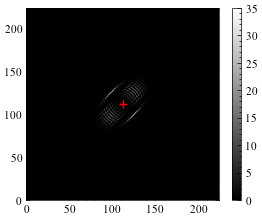

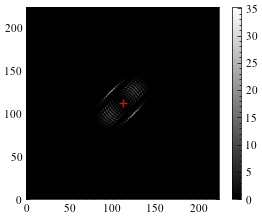

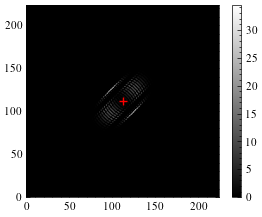

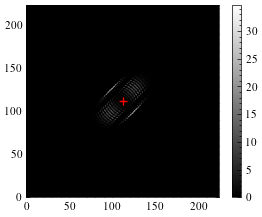

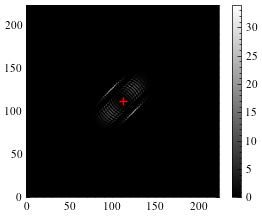

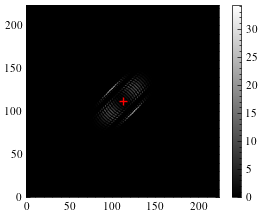

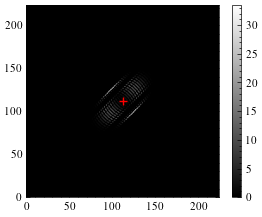

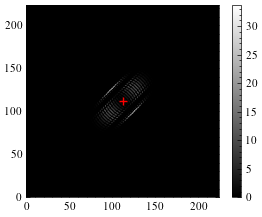

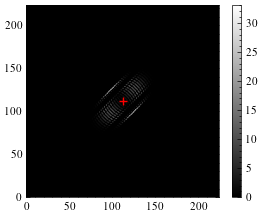

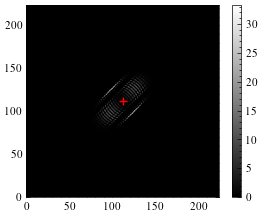

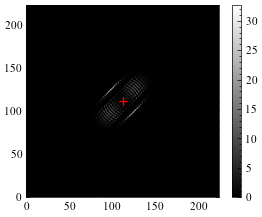

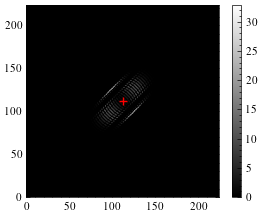

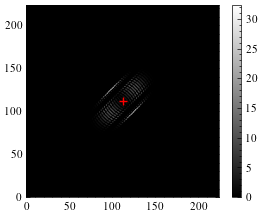

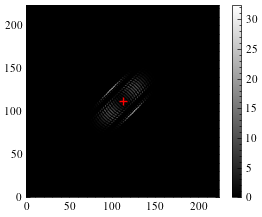

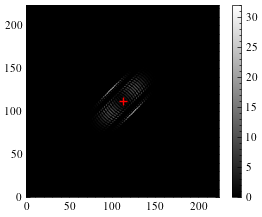

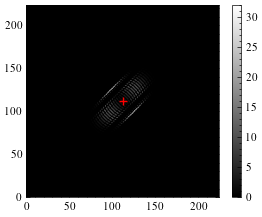

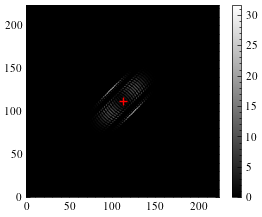

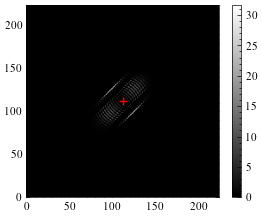

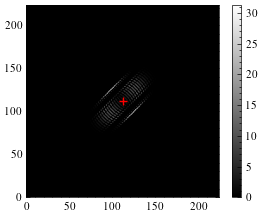

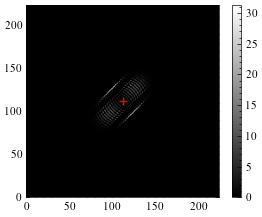

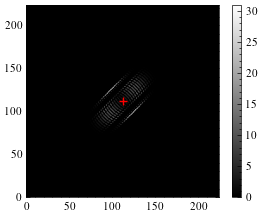

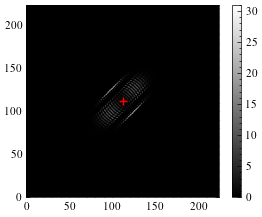

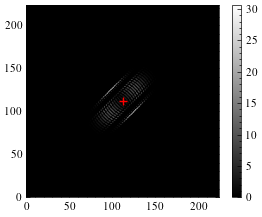

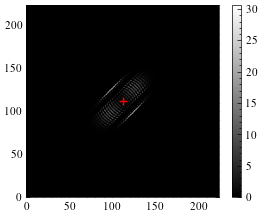

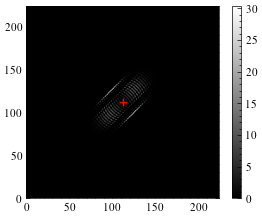

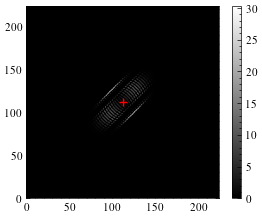

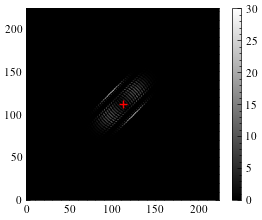

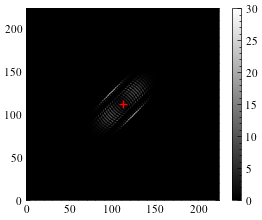

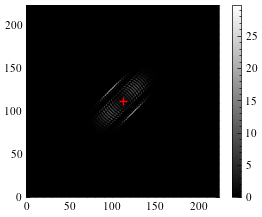

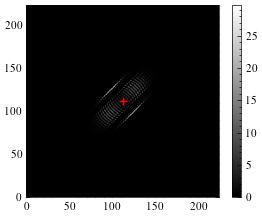

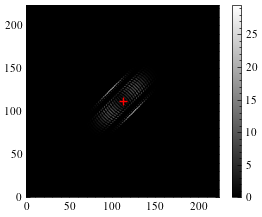

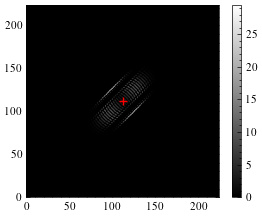

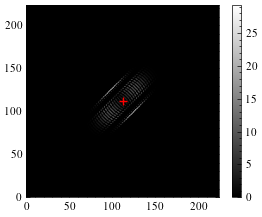

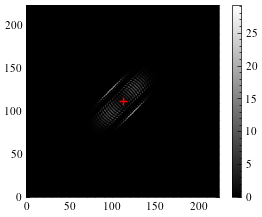

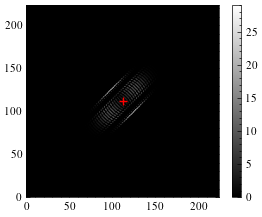

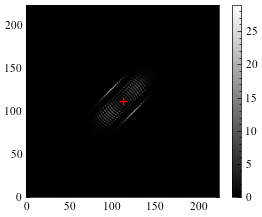

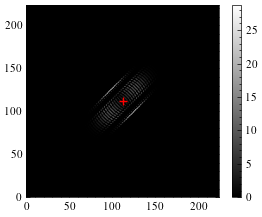

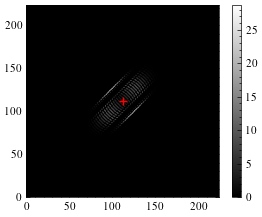

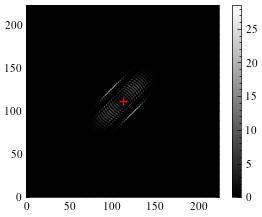

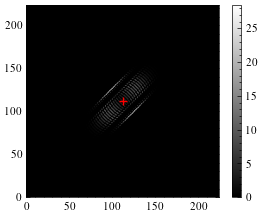

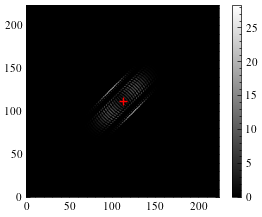

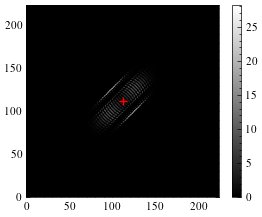

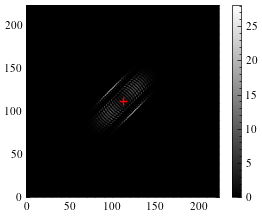

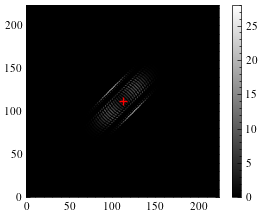

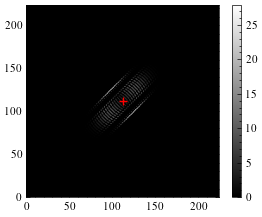

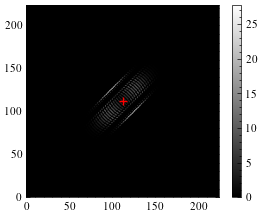

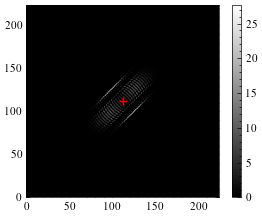

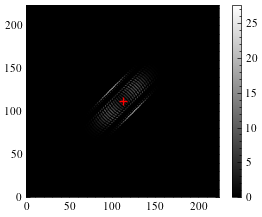

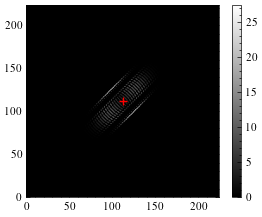

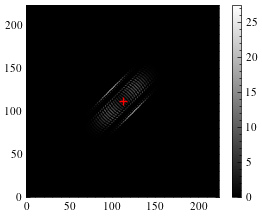

In [16]:
import matplotlib.patches as mpatches

w =tf.cast(filters, dtype=tf.float32)# tf.expand_dims(filters, -1), dtype=tf.float32)
w = tf.transpose(w, perm=(1,0,2,3))
print(w.shape)

x = img


directory = f"figures/hand_antisym_unipolar"
if not os.path.exists(directory):
	os.makedirs(directory)
x = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = filters.shape[-2], axis=-1), dtype=tf.float32) 
for i in range(80):
	print(i)
	fig, ax = plt.subplots()
	print(x.shape)
	x = x/np.std(x)
	vals = x[0, x.shape[1]//2, :, :]
	vals = vals/np.sum(vals)

	'''print("VALS", np.sum(vals))
	pos = np.expand_dims(np.linspace(-x.shape[1]//2, x.shape[1]//2, x.shape[1]),-1)
	mean = tf.reduce_sum(pos*vals)
	var = tf.reduce_sum(((pos-mean)**2) * vals)
	std = np.sqrt(var)
	print(mean, np.sqrt(var))'''
	
	#x = tf.repeat(x , repeats = filters.shape[-2], axis=-1)
	print(x.shape)

	im = ax.imshow(np.sum(x[0,:,:,:], axis=-1), cmap='gray')
	ax.plot(112, 112, marker = '+', color='red')

	#ax.plot(112+mean, 112, marker = ".", color='black')
	'''arr =  mpatches.FancyArrowPatch((112.+mean, 112.), (112+mean+std, 112),
                               mutation_scale=4, shrinkA=0, shrinkB=0,zorder=10, color="red")
	ax.add_patch(arr)
	
	ax.annotate(r'$\sigma=$'+f"{std:.2f}", (.5, 6), xycoords=arr, ha='center', va='bottom',color='white')'''
	#ax.arrow(, 112, dx=, dy= 0, color='black')

	ax.set(xlim=(0, 224), ylim=(0, 224))

	fig.colorbar(im, orientation='vertical')
	fig.savefig(directory + f'/{i}.pdf', dpi=600,  transparent=True, bbox_inches='tight')

	x = tf.nn.relu( tf.nn.conv2d(x, w , strides=(1,1), 
							padding='SAME') )
